In [1]:
import importlib
starsex = importlib.import_module("02_SExtractor")

> 
----- Source Extractor 2.25.0 started on 2024-04-19 at 10:55:44 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for gds-grizli-v7.0-f200w-clear_drc_sci.fits
----- Measuring from: gds-grizli-v7.0-f200w-clear_drc_sci.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
> Looking for gds-grizli-v7.0-f200w-clear_drc_wht.fits
----- Weighting from: gds-grizli-v7.0-f200w-clear_drc_wht.fits
      "Unnamed" / no ext. header / 28672x28672 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  256
> Setting up background map at line:  512
> Setting up background map at line:  768
> Setting up background map at line: 1024
> Setting up background map at line: 1280
> Setting up background map at line: 1536
> Setting up background map at line: 1792
> Setting up background ma

DBSCAN clustering : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), array([ 620, 5083,   25,    6,    9,   13,   17,    6,   24,    8,   12,
          9,    5,    5,   41,    9,    7,    6,    6,    6,    7,    6,
         22,    8,    7,    5,    5,    5,    5,    5]))


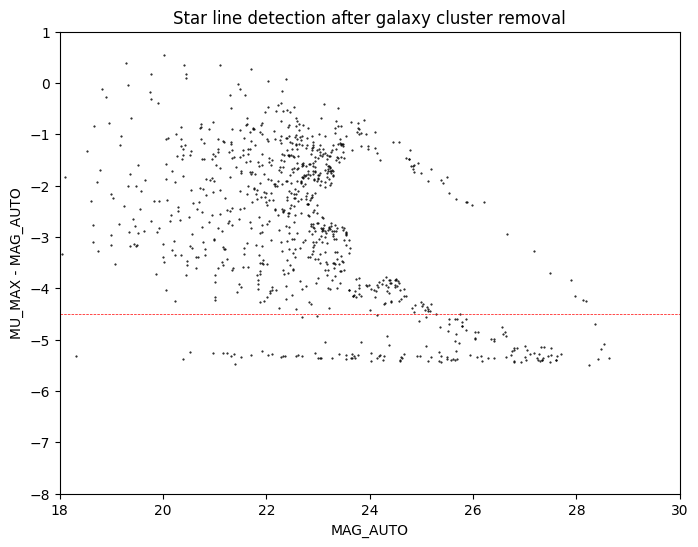

RANSAC Slope : -0.014
Star line    : -5.348


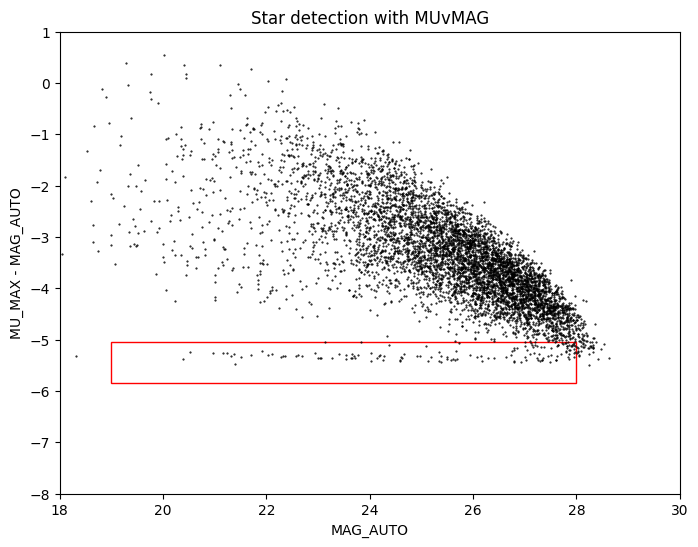

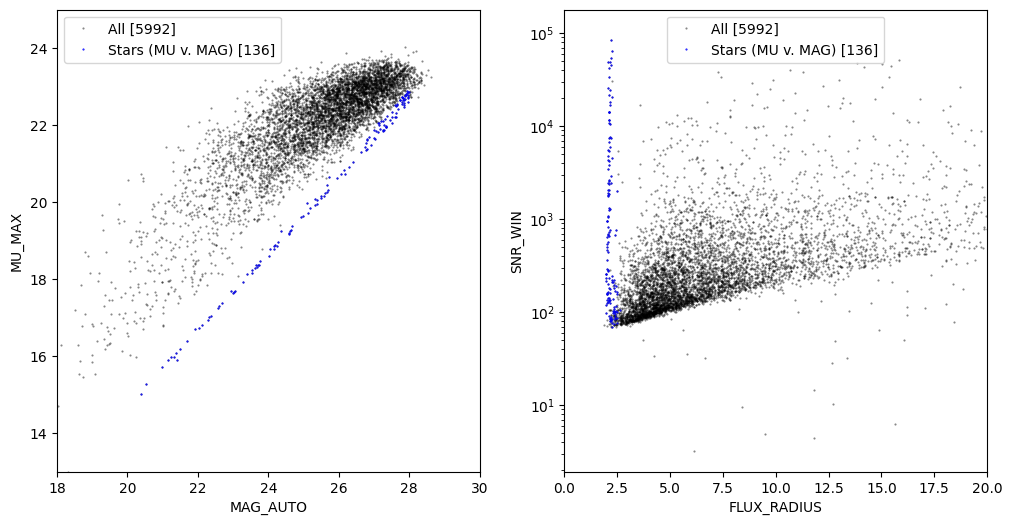

In [7]:
filter = 'f200w'
starsex.extract_stars(detect_img      = f"/home/aurelien/DAWN/DJA_SE++/image/GDS/gds-grizli-v7.0-{filter}-clear_drc_sci.fits", \
                      weight_img      = f"/home/aurelien/DAWN/DJA_SE++/image/GDS/gds-grizli-v7.0-{filter}-clear_drc_wht.fits", \
                      output_cat      = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_cat.fits", \
                      output_cat_star = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_cat_star.fits", \
                      config_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST.sex", \
                      params_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST-SW.param", \
                      dir_chckimg     = "/home/aurelien/DAWN/DJA_SE++/JADES-checkimages", \
                      detect_thresh = 12.0, analysis_thresh = 2.5, \
                      y_max = -4.5, \
                      save_chckimg = True, plot = True, verbose = True)

## Explanation (to clean-up)

In [21]:
import os

In [2]:
config_file = '/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST.sex'
params_file = '/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST-SW.param'

In [3]:
dir_catalog = '/home/aurelien/DAWN/DJA_SE++/JADES-catalog'
dir_chckimg = '/home/aurelien/DAWN/DJA_SE++/JADES-checkimages'
if not os.path.exists(dir_catalog): os.mkdir(dir_catalog)
if not os.path.exists(dir_chckimg): os.mkdir(dir_chckimg)

In [4]:
dir_image = '/home/aurelien/DAWN/DJA_SE++/image/GDS'
# filters = ['090w', '115w', '150w', '200w', '277w', '356w', '444w']
study_name = f'gds-grizli-v7.0-f444w-clear_drc'

In [5]:
detect_img = f'{dir_image}/{study_name}_sci.fits'
weight_img = f'{dir_image}/{study_name}_wht.fits'

output_cat = f'{dir_catalog}/{study_name}_cat.fits'
output_img = f'{dir_chckimg}/{study_name}_seg.fits'

In [6]:
detect_thresh = 12.0 # default 3.0
analysis_thresh = 2.5 # default 2.5
os.system(f'source-extractor {detect_img} -c {config_file} \
          -CATALOG_NAME {output_cat} \
          -WEIGHT_IMAGE {weight_img} -WEIGHT_TYPE MAP_WEIGHT \
          -PARAMETERS_NAME {params_file} \
          -CHECKIMAGE_NAME {output_img} \
          -DETECT_THRESH {detect_thresh} -ANALYSIS_THRESH {analysis_thresh}')

> 
----- Source Extractor 2.25.0 started on 2024-04-12 at 13:08:33 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for gds-grizli-v7.0-f444w-clear_drc_sci.fits
----- Measuring from: gds-grizli-v7.0-f444w-clear_drc_sci.fits
      "Unnamed" / no ext. header / 14336x14336 / 32 bits (floats)
> Looking for gds-grizli-v7.0-f444w-clear_drc_wht.fits
----- Weighting from: gds-grizli-v7.0-f444w-clear_drc_wht.fits
      "Unnamed" / no ext. header / 14336x14336 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  256
> Setting up background map at line:  512
> Setting up background map at line:  768
> Setting up background map at line: 1024
> Setting up background map at line: 1280
> Setting up background map at line: 1536
> Setting up background map at line: 1792
> Setting up background ma

0

## Selection of point sources

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import SymLogNorm
from matplotlib.patches import Rectangle
import random as rd
from sklearn.cluster import DBSCAN
from sklearn.linear_model import RANSACRegressor

In [8]:
hdul = fits.open(output_cat)
data = hdul[2].data

In [9]:
headers = data.columns.info('name', output=False)
print(headers['name'])

['NUMBER', 'FLAGS', 'X_IMAGE', 'Y_IMAGE', 'XWIN_IMAGE', 'YWIN_IMAGE', 'X2_IMAGE', 'Y2_IMAGE', 'XY_IMAGE', 'ERRX2_IMAGE', 'ERRY2_IMAGE', 'ERRXY_IMAGE', 'X_WORLD', 'Y_WORLD', 'XWIN_WORLD', 'YWIN_WORLD', 'X2_WORLD', 'Y2_WORLD', 'XY_WORLD', 'ERRX2_WORLD', 'ERRY2_WORLD', 'ERRXY_WORLD', 'ALPHA_J2000', 'DELTA_J2000', 'ALPHAWIN_J2000', 'DELTAWIN_J2000', 'A_IMAGE', 'B_IMAGE', 'ERRA_IMAGE', 'ERRB_IMAGE', 'A_WORLD', 'B_WORLD', 'ERRA_WORLD', 'ERRB_WORLD', 'THETA_IMAGE', 'ERRTHETA_IMAGE', 'THETA_WORLD', 'ERRTHETA_WORLD', 'THETA_J2000', 'ERRTHETA_J2000', 'ELONGATION', 'ELLIPTICITY', 'FLUX_APER', 'FLUXERR_APER', 'MAG_APER', 'MAGERR_APER', 'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO', 'MAGERR_AUTO', 'FLUX_PETRO', 'FLUXERR_PETRO', 'MAG_PETRO', 'MAGERR_PETRO', 'FLUX_ISO', 'FLUXERR_ISO', 'MAG_ISO', 'MAGERR_ISO', 'FLUX_ISOCOR', 'FLUXERR_ISOCOR', 'MAG_ISOCOR', 'MAGERR_ISOCOR', 'FLUX_RADIUS', 'KRON_RADIUS', 'PETRO_RADIUS', 'BACKGROUND', 'THRESHOLD', 'MU_THRESHOLD', 'FLUX_MAX', 'MU_MAX', 'ISOAREA_IMAGE', 'ISOAREA

In [10]:
def show_vignets(cat, grid_n):
    n = len(cat)
    a, b = grid_n
    selected = rd.sample(range(n), a*b)
    fig, ax = plt.subplots(a,b,figsize=(4*b,4*a))
    for i in range(a):
        for j in range(b):
            ax[i,j].imshow(cat['VIGNET'][selected[i*b+j]], 
                           origin='lower', cmap=colormaps['bone_r'], 
                           norm=SymLogNorm(linthresh=1e-2, linscale=0.1, vmin=-0.1, vmax=0.5))
            ax[i,j].set_title(selected[i*b+j])
    plt.show()

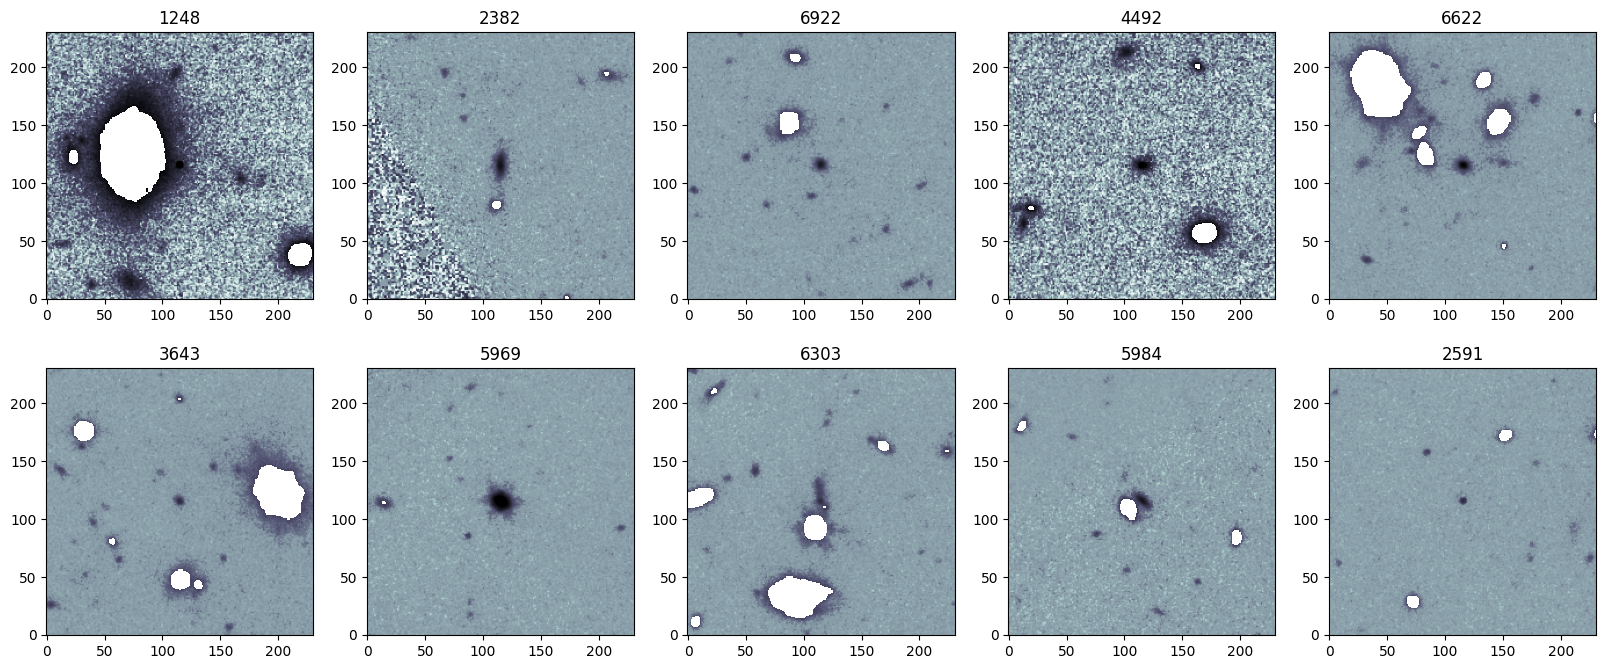

In [45]:
show_vignets(data, (2,5))

In [11]:
def plot_MuvMAG(cat, star_selections=[], mag_bounds=(17,30), mu_bounds=(13,25), ax_custom=None):
    # star_selection = {<name> : {'label':<label>, 'color':<color>, 'flag':<array_of_indices>}}
    # MU_MAX = max pixel value in mag/arcsec² (MAG_ZEROPOINT - 2.5*log10(FLUX_MAX*PIXELSCALE²))
    # MAG_AUTO = total flux in mag (MAG_ZEROPOINT - 2.5*log10(FLUX_AUTO))
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['MAG_AUTO'], data['MU_MAX'], marker='o', ms=0.5, ls="", alpha=0.5, c='k', label=f'All [{len(data)}]', rasterized=True)
    for name in star_selections:
        selection = star_selections[name]
        ax.plot(data[selection['flag']]['MAG_AUTO'], data[selection['flag']]['MU_MAX'], 
                   marker='o', ms=0.5, ls="", c=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]",
                   rasterized=True)
    ax.set_xlabel('MAG_AUTO')
    ax.set_ylabel('MU_MAX')
    ax.set_xlim(mag_bounds[0],mag_bounds[1])
    ax.set_ylim(mu_bounds[0],mu_bounds[1])
    ax.legend(loc='best')
    if ax_custom is None: plt.show()

def hist_CLASS_STAR(cat, star_selections=[], hist_bound=500, ax_custom=None):
    # star_selection = {<name> : {'label':<label>, 'color':<color>, 'flag':<array_of_indices>}}
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.hist(data['CLASS_STAR'], bins=100, color='k', label=f'All [{len(data)}]')
    for name in star_selections:
        selection = star_selections[name]
        ax.hist(data[selection['flag']]['CLASS_STAR'], bins=100, range=(0,1),
                color=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]")
    ax.set_ylabel('CLASS_STAR')
    ax.set_ylim(0,hist_bound)
    ax.legend(loc='best')
    if ax_custom is None: plt.show()

def plot_SNR_radius(cat, star_selections=[], rad_bound=20, ax_custom=None):
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['FLUX_RADIUS'], data['SNR_WIN'], marker='o', ms=0.5, ls="", alpha=0.5, c='k', label=f'All [{len(data)}]', rasterized=True)
    for name in star_selections:
        selection = star_selections[name]
        ax.plot(data[selection['flag']]['FLUX_RADIUS'], data[selection['flag']]['SNR_WIN'],
                   marker='o', ms=0.5, ls="", c=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]",
                   rasterized=True)
    ax.set_xlabel('FLUX_RADIUS')
    ax.set_ylabel('SNR_WIN')
    ax.set_yscale('log')
    ax.set_xlim(0, rad_bound)
    ax.legend()
    if ax_custom is None: plt.show()

star_selections={}

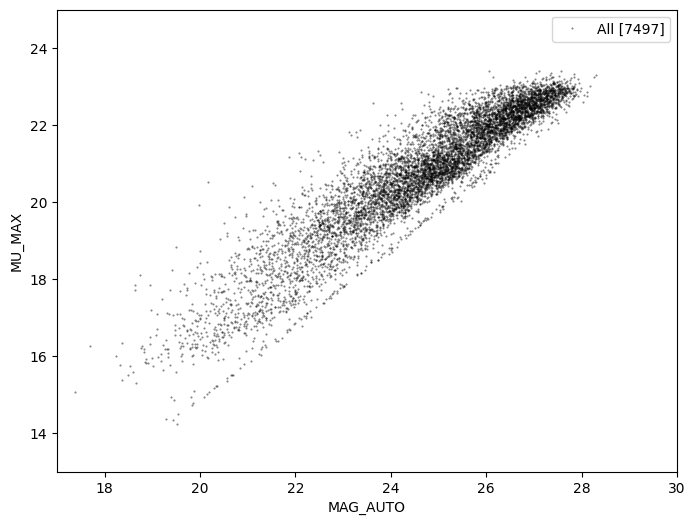

In [12]:
plot_MuvMAG(data, mag_bounds=(17,30), mu_bounds=(13,25))

In [13]:
# CLASS_STAR > 0.9
star_CLASS_STAR = np.where(data['CLASS_STAR']>0.9)[0]
star_selections['CLASS_STAR'] = {'label': 'Stars (CLASS_STAR)', 'color': 'r', 'flag': star_CLASS_STAR}

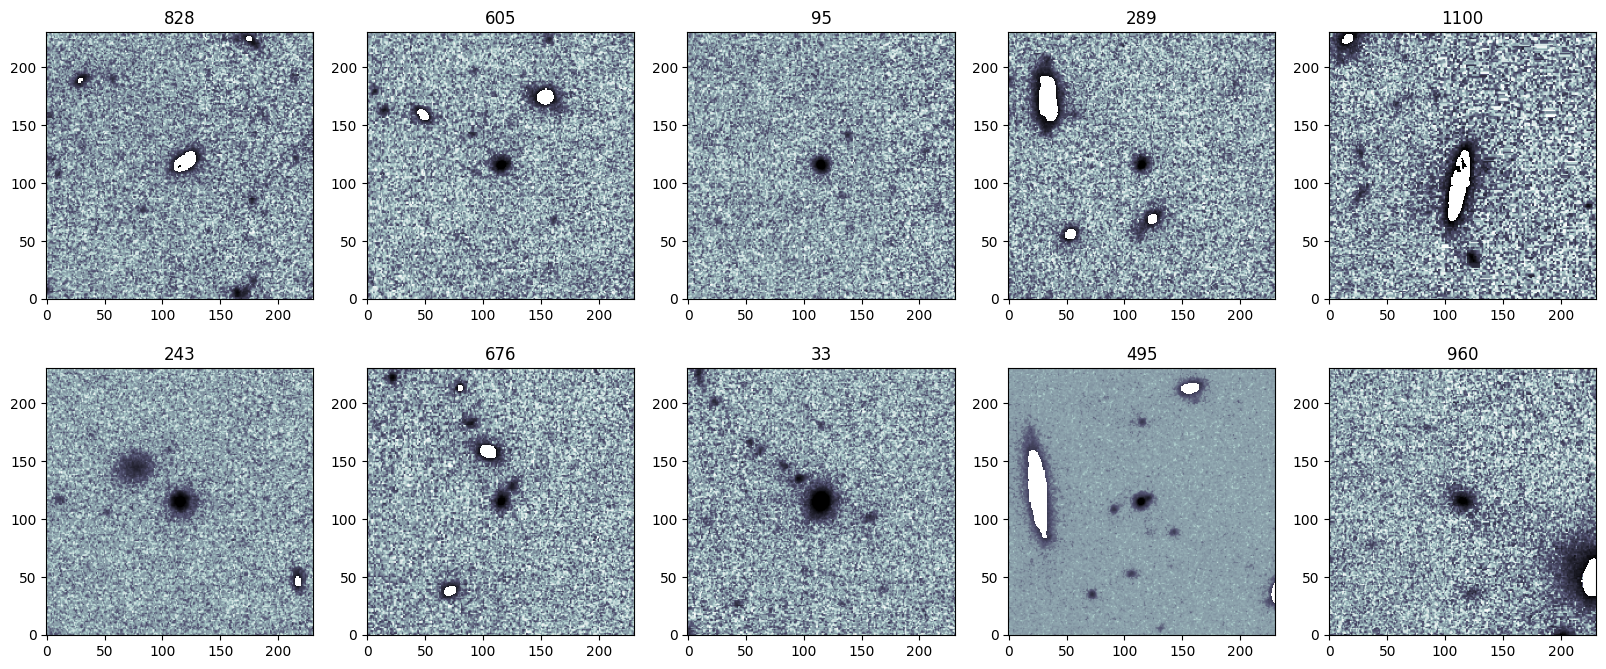

In [14]:
show_vignets(data[star_CLASS_STAR], (2,5))

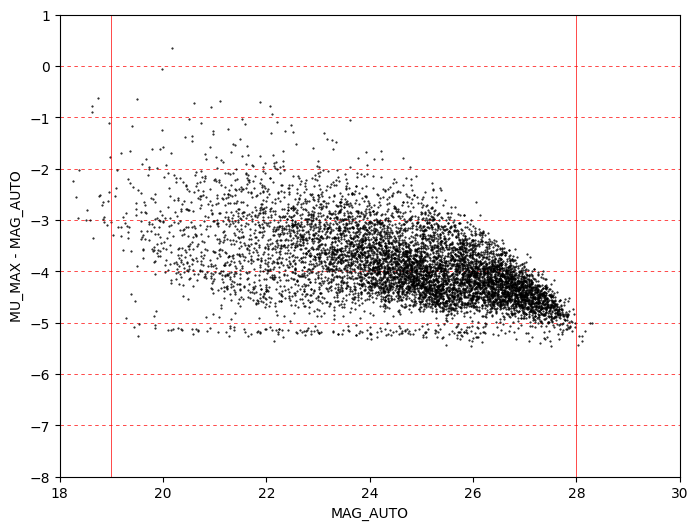

In [15]:
# MU_MAX v. MAG_AUTO selection

def plot_MuvMAG_manual(data, mag_bounds=(19,28), 
                       ax_custom=None, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1)):
    """ 
    Plots MU_MAX-MAG_AUTO v. MAG_AUTO with
    guides to manually select the star line.
    """
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO'], marker='o', ls="", ms=0.5, c='k', rasterized=True)
    ax.axvline(mag_bounds[0], color='r', linewidth=0.5)
    ax.axvline(mag_bounds[1], color='r', linewidth=0.5)
    ax.set_xlabel('MAG_AUTO')
    ax.set_ylabel('MU_MAX - MAG_AUTO')
    ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
    ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
    ax.grid(axis='y', color='r', linewidth=0.5, linestyle=(0, (5, 5)), alpha=1)
    ax.set_axisbelow(True)
    if ax_custom is None: plt.show()

plot_MuvMAG_manual(data)

In [16]:
def find_star_line(data, eps_DBSCAN=0.1, y_max=-4, mag_fit=25, verbose=False, 
                   plot=False, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1)):
    """
    Finds the star line on the MU_MAX v. MAG_AUTO plot.
    1. Remove the main galaxy cluster using DBSCAN (eps_DBSCAN parameter).
    2. RANSAC regression to find the star line on the remaining points,
        and with MU_MAX-MAG_AUTO < y_max
    3. Calculates the star line position at MAG_AUTO = mag_fit
    """
    # Remove galaxy cluster
    values = np.vstack([data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO']])
    clustering = DBSCAN(eps=eps_DBSCAN).fit(values.T)
    if verbose : print(f'DBSCAN clustering : {np.unique(clustering.labels_, return_counts=True)}')
    # Find star line
    A = data[clustering.labels_ != 0]
    B = A[A['MU_MAX']-A['MAG_AUTO'] < y_max]
    if plot:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(A['MAG_AUTO'], A['MU_MAX']-A['MAG_AUTO'], ms=0.5, ls="", marker='o', c='k', rasterized=True)
        ax.axhline(y_max, color='r', linewidth=0.5, linestyle='--')
        ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
        ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
        ax.set_xlabel('MAG_AUTO')
        ax.set_ylabel('MU_MAX - MAG_AUTO')
        ax.set_title("Star line detection after galaxy cluster removal")
        plt.show()
    ransac = RANSACRegressor()
    ransac.fit(B['MAG_AUTO'].reshape(-1,1), (B['MU_MAX']-B['MAG_AUTO']).reshape(-1,1))
    if (slope:=abs(ransac.estimator_.coef_[0][0])) > 0.1: 
        print(f"WARNING : Star line may be wrong (Slope = {slope:.3f})")
    c = ransac.predict([[mag_fit]])[0,0]
    if verbose: print(f"{'RANSAC Slope':<13}: {ransac.estimator_.coef_[0][0]:.3f}")
    if verbose: print(f"{'Star line':<13}: {c:.3f}")
    return c

def MUvMAG_star_selection(data, star_line, y_offsets=(-0.5,0.3), mag_bounds=(19,28), 
                          plot=True, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1)):
    """
    Selects the stars according to the MU_MAX v. MAG_AUTO box.
    star_line : Star line value of MU_MAX - MAG_AUTO
    y_offsets : Negative and positive offsets from star_line for the selection box
    mag_bounds : MAG_AUTO bounds for the selection box
    """
    if plot:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO'], ms=0.5, ls="", marker='o', c='k', rasterized=True)
        ax.add_patch(Rectangle((19, star_line + y_offsets[0]), 
                                mag_bounds[1]-mag_bounds[0], 
                                y_offsets[1]-y_offsets[0], 
                                fill=False, edgecolor='r', lw=1))
        ax.set_xlabel('MAG_AUTO')
        ax.set_ylabel('MU_MAX - MAG_AUTO')
        ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
        ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
        ax.set_title("Star detection with MUvMAG")
        plt.show()
    star_MUvMAG = np.where((data['MU_MAX'] < data['MAG_AUTO'] + star_line + y_offsets[1]) & \
                           (data['MU_MAX'] > data['MAG_AUTO'] + star_line + y_offsets[0]) & \
                           (data['MAG_AUTO'] < mag_bounds[1]) & \
                           (data['MAG_AUTO'] > mag_bounds[0]))[0]
    return star_MUvMAG

DBSCAN clustering : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38]), array([ 542, 6475,   51,   37,    7,   19,   20,    7,   12,   13,    7,
          7,   14,   26,   64,    7,   11,   18,    7,   11,   15,    6,
          6,   11,    7,    7,    7,    7,   12,    9,    5,    6,    5,
          7,    5,    5,    6,    6,    5,    5]))


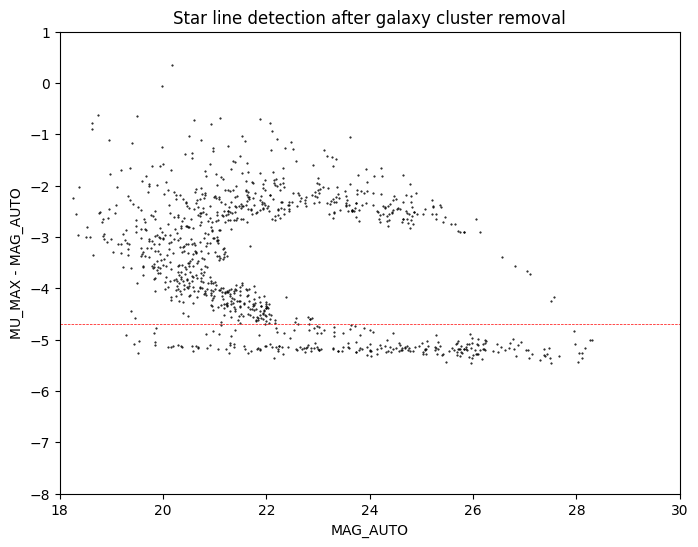

RANSAC Slope : -0.013
Star line    : -5.193


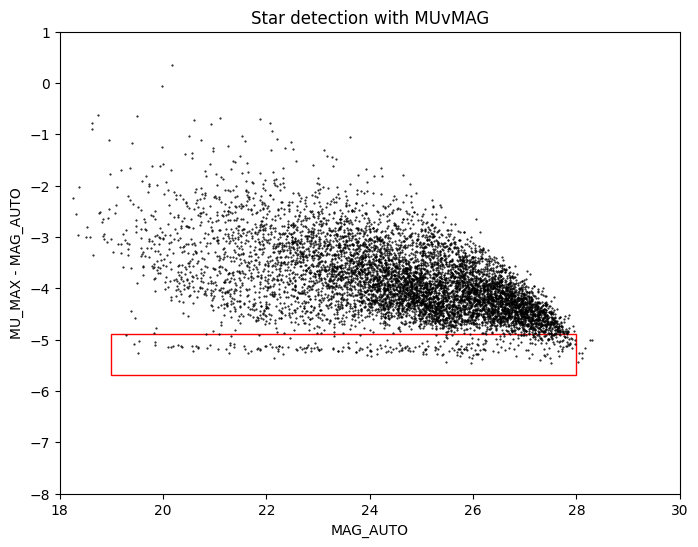

In [17]:
star_line = find_star_line(data, y_max=-4.7, verbose=True, plot=True)

star_MUvMAG = MUvMAG_star_selection(data, star_line, y_offsets=(-0.5,0.3), mag_bounds=(19,28), plot=True)

In [18]:
star_selections['MUvMAG'] = {'label': 'Stars (MU v. MAG)', 'color': 'b', 'flag': star_MUvMAG}

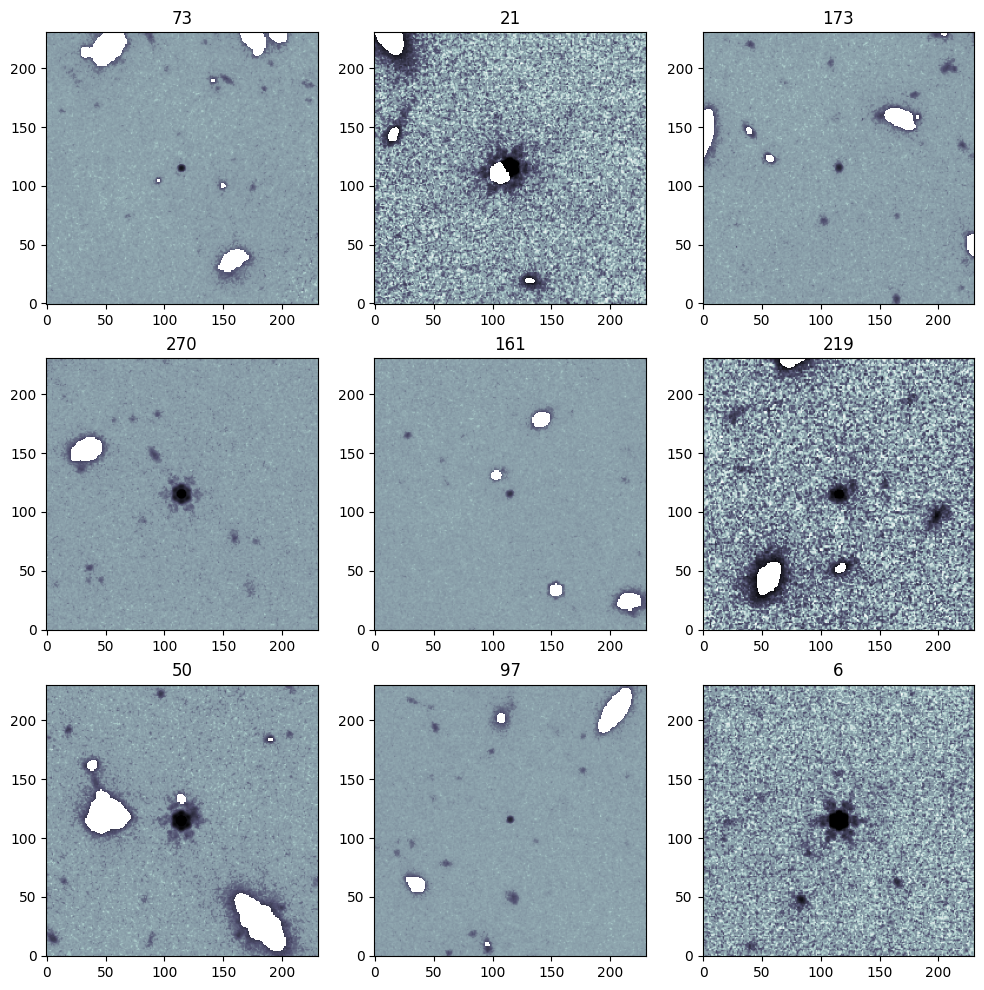

In [20]:
show_vignets(data[star_MUvMAG], (3,3))

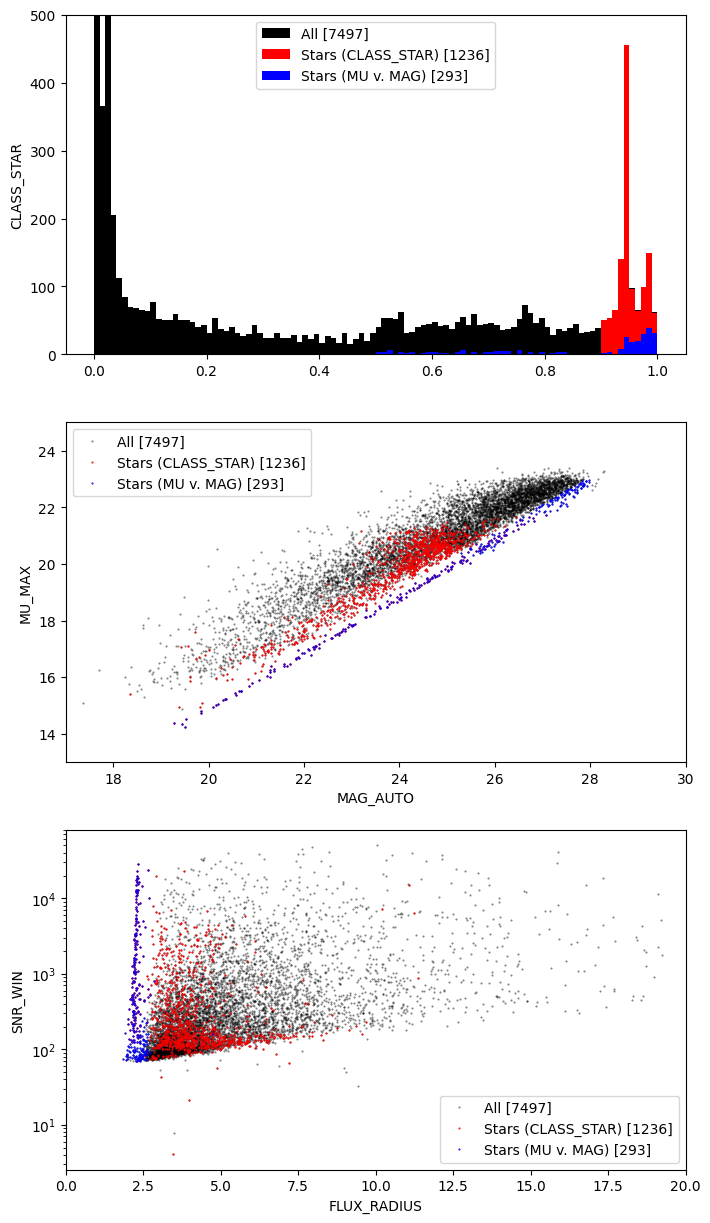

In [19]:
fig, ax = plt.subplots(3,1,figsize=(8,15))
hist_CLASS_STAR(data, star_selections, ax_custom=ax[0])
plot_MuvMAG(data, star_selections, mag_bounds=(17,30), mu_bounds=(13,25), ax_custom=ax[1])
plot_SNR_radius(data, star_selections, rad_bound=20, ax_custom=ax[2])
plt.show()

## Save new catalog

In [49]:
print(data[star_MUvMAG]['NUMBER'])

[    7    25    85   101   141   151   179   180   223   254   297   315
   461   530   534   574   620   629   659   690   709   713   716   726
   735   738   776   815   835   839   844   877   882   946   950   955
  1053  1055  1157  1186  1193  1202  1214  1221  1241  1287  1330  1440
  1444  1473  1489  1501  1514  1739  1744  1784  1872  1943  1979  1982
  2171  2194  2240  2361  2519  2664  2677  2884  2928  3043  3064  3165
  3170  3242  3253  3287  3315  3370  3458  3546  3567  3627  4166  4246
  4288  4440  4441  4570  4580  4622  4658  4888  4998  5100  5509  5718
  5813  6104  6366  6490  6704  7146  7400  7530  8398  8765  9002  9014
  9061  9193  9263  9413  9471  9566  9576  9654  9713  9928 10045 10143
 10230 10371 10380 10398 10450 10539 10606 10763 10801 10821 10885 11663
 11754 11818 11924 11932 12105 12239 12293 12656 12666 12835 12886 12933
 12936 12976 13100 13140 13155 13180 13265 13351 13361]


In [50]:
hdul[2].data = data[star_MUvMAG]
# hdul[2].data = data[[0,1]]
hdul[2].update_header()

In [51]:
hdul.writeto(f'{dir_catalog}/{study_name}_star_cat.fits', overwrite=True, output_verify='exception')

### Sum-up functions

In [47]:
def run_sextractor(detect_img    : str, weight_img   : str, 
                   output_cat    : str, 
                   config_file   : str, params_file  : str,
                   dir_chckimg   : str,
                   detect_thresh : float = 12.0,
                   verbose       : bool = False) -> None :
    if not os.path.exists("/".join(output_cat.split("/")[:-1])): os.mkdir("/".join(output_cat.split("/")[:-1]))
    if not os.path.exists(dir_chckimg): os.mkdir(dir_chckimg)
    output_img = f'{dir_chckimg}/{study_name}_seg.fits'
    verbose_type = 'NORMAL' if verbose else 'QUIET'
    os.system(f'source-extractor {detect_img} -c {config_file} \
            -CATALOG_NAME {output_cat} \
            -WEIGHT_IMAGE {weight_img} -WEIGHT_TYPE MAP_WEIGHT \
            -PARAMETERS_NAME {params_file} \
            -CHECKIMAGE_NAME {output_img} \
            -DETECT_THRESH {detect_thresh} \
            -VERBOSE_TYPE {verbose_type}')

In [48]:
def show_vignets(cat, grid_n):
    n = len(cat)
    a, b = grid_n
    selected = rd.sample(range(n), a*b)
    fig, ax = plt.subplots(a,b,figsize=(4*b,4*a))
    for i in range(a):
        for j in range(b):
            ax[i,j].imshow(cat['VIGNET'][selected[i*b+j]], 
                           origin='lower', cmap=colormaps['bone_r'], 
                           norm=SymLogNorm(linthresh=1e-2, linscale=0.1, vmin=-0.1, vmax=0.5))
            ax[i,j].set_title(selected[i*b+j])
    plt.show()

In [49]:
def plot_MuvMAG(cat, star_selections=[], mag_bounds=(17,30), mu_bounds=(13,25), ax_custom=None):
    # star_selection = {<name> : {'label':<label>, 'color':<color>, 'flag':<array_of_indices>}}
    # MU_MAX = max pixel value in mag/arcsec² (MAG_ZEROPOINT - 2.5*log10(FLUX_MAX*PIXELSCALE²))
    # MAG_AUTO = total flux in mag (MAG_ZEROPOINT - 2.5*log10(FLUX_AUTO))
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['MAG_AUTO'], data['MU_MAX'], marker='o', ms=0.5, ls="", alpha=0.5, c='k', label=f'All [{len(data)}]', rasterized=True)
    for name in star_selections:
        selection = star_selections[name]
        ax.plot(data[selection['flag']]['MAG_AUTO'], data[selection['flag']]['MU_MAX'], 
                   marker='o', ms=0.5, ls="", c=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]",
                   rasterized=True)
    ax.set_xlabel('MAG_AUTO')
    ax.set_ylabel('MU_MAX')
    ax.set_xlim(mag_bounds[0],mag_bounds[1])
    ax.set_ylim(mu_bounds[0],mu_bounds[1])
    ax.legend(loc='best')
    if ax_custom is None: plt.show()

def hist_CLASS_STAR(cat, star_selections=[], hist_bound=500, ax_custom=None):
    # star_selection = {<name> : {'label':<label>, 'color':<color>, 'flag':<array_of_indices>}}
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.hist(data['CLASS_STAR'], bins=100, color='k', label=f'All [{len(data)}]')
    for name in star_selections:
        selection = star_selections[name]
        ax.hist(data[selection['flag']]['CLASS_STAR'], bins=100, range=(0,1),
                color=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]")
    ax.set_ylabel('CLASS_STAR')
    ax.set_ylim(0,hist_bound)
    ax.legend(loc='best')
    if ax_custom is None: plt.show()

def plot_SNR_radius(cat, star_selections=[], rad_bound=20, ax_custom=None):
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['FLUX_RADIUS'], data['SNR_WIN'], marker='o', ms=0.5, ls="", alpha=0.5, c='k', label=f'All [{len(data)}]', rasterized=True)
    for name in star_selections:
        selection = star_selections[name]
        ax.plot(data[selection['flag']]['FLUX_RADIUS'], data[selection['flag']]['SNR_WIN'],
                   marker='o', ms=0.5, ls="", c=selection['color'], label=f"{selection['label']} [{len(selection['flag'])}]",
                   rasterized=True)
    ax.set_xlabel('FLUX_RADIUS')
    ax.set_ylabel('SNR_WIN')
    ax.set_yscale('log')
    ax.set_xlim(0, rad_bound)
    ax.legend()
    if ax_custom is None: plt.show()

def plot_MuvMAG_manual(data, mag_bounds=(19,28), 
                       ax_custom=None, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1)):
    """ 
    Plots MU_MAX-MAG_AUTO v. MAG_AUTO with
    guides to manually select the star line.
    """
    ax = plt.subplots(figsize=(8,6))[1] if ax_custom is None else ax_custom
    ax.plot(data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO'], marker='o', ls="", ms=0.5, c='k', rasterized=True)
    ax.axvline(mag_bounds[0], color='r', linewidth=0.5)
    ax.axvline(mag_bounds[1], color='r', linewidth=0.5)
    ax.set_xlabel('MAG_AUTO')
    ax.set_ylabel('MU_MAX - MAG_AUTO')
    ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
    ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
    ax.grid(axis='y', color='r', linewidth=0.5, linestyle=(0, (5, 5)), alpha=1)
    ax.set_axisbelow(True)
    if ax_custom is None: plt.show()

In [50]:
def find_star_line(data, eps_DBSCAN=0.1, y_max=-4, mag_fit=25, verbose=False, 
                   plot=False, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1),
                   save=False, save_name=None):
    """
    Finds the star line on the MU_MAX v. MAG_AUTO plot.
    1. Remove the main galaxy cluster using DBSCAN (eps_DBSCAN parameter).
    2. RANSAC regression to find the star line on the remaining points,
        and with MU_MAX-MAG_AUTO < y_max
    3. Calculates the star line position at MAG_AUTO = mag_fit
    """
    # Remove galaxy cluster
    values = np.vstack([data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO']])
    clustering = DBSCAN(eps=eps_DBSCAN).fit(values.T)
    if verbose : print(f'DBSCAN clustering : {np.unique(clustering.labels_, return_counts=True)}')
    # Find star line
    A = data[clustering.labels_ != 0]
    B = A[A['MU_MAX']-A['MAG_AUTO'] < y_max]
    if plot | save:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(A['MAG_AUTO'], A['MU_MAX']-A['MAG_AUTO'], ms=0.5, ls="", marker='o', c='k', rasterized=True)
        ax.axhline(y_max, color='r', linewidth=0.5, linestyle='--')
        ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
        ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
        ax.set_xlabel('MAG_AUTO')
        ax.set_ylabel('MU_MAX - MAG_AUTO')
        ax.set_title("Star line detection after galaxy cluster removal")
        if save : fig.savefig(save_name, bbox_inches='tight', dpi=100)
        if plot : plt.show()
    ransac = RANSACRegressor()
    ransac.fit(B['MAG_AUTO'].reshape(-1,1), (B['MU_MAX']-B['MAG_AUTO']).reshape(-1,1))
    if (slope:=abs(ransac.estimator_.coef_[0][0])) > 0.1: 
        print(f"\33[33m WARNING \33[0m : Star line may be wrong (Slope = {slope:.3f})")
    c = ransac.predict([[mag_fit]])[0,0]
    if verbose: print(f"{'RANSAC Slope':<13}: {ransac.estimator_.coef_[0][0]:.3f}")
    if verbose: print(f"{'Star line':<13}: {c:.3f}")
    return c

def MUvMAG_star_selection(data, star_line, y_offsets=(-0.5,0.3), mag_bounds=(19,28), 
                          plot=False, plot_mag_bounds=(18,30), plot_y_bounds=(-8,1),
                          save=False, save_name=None):
    """
    Selects the stars according to the MU_MAX v. MAG_AUTO box.
    star_line : Star line value of MU_MAX - MAG_AUTO
    y_offsets : Negative and positive offsets from star_line for the selection box
    mag_bounds : MAG_AUTO bounds for the selection box
    """
    if plot | save:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(data['MAG_AUTO'], data['MU_MAX']-data['MAG_AUTO'], ms=0.5, ls="", marker='o', c='k', rasterized=True)
        ax.add_patch(Rectangle((19, star_line + y_offsets[0]), 
                                mag_bounds[1]-mag_bounds[0], 
                                y_offsets[1]-y_offsets[0], 
                                fill=False, edgecolor='r', lw=1))
        ax.set_xlabel('MAG_AUTO')
        ax.set_ylabel('MU_MAX - MAG_AUTO')
        ax.set_xlim(plot_mag_bounds[0], plot_mag_bounds[1])
        ax.set_ylim(plot_y_bounds[0], plot_y_bounds[1])
        ax.set_title("Star detection with MUvMAG")
        if save : fig.savefig(save_name, bbox_inches='tight', dpi=100)
        if plot : plt.show()
    star_MUvMAG = np.where((data['MU_MAX'] < data['MAG_AUTO'] + star_line + y_offsets[1]) & \
                           (data['MU_MAX'] > data['MAG_AUTO'] + star_line + y_offsets[0]) & \
                           (data['MAG_AUTO'] < mag_bounds[1]) & \
                           (data['MAG_AUTO'] > mag_bounds[0]))[0]
    return star_MUvMAG

In [51]:
def save_catalog(hdul, selection, outcat_name):
    hdul[2].data = hdul[2].data[selection]
    hdul[2].update_header()
    hdul.writeto(outcat_name, overwrite=True)

In [52]:
def extract_stars(detect_img        : str, 
                  weight_img        : str, 
                  output_cat        : str,
                  output_cat_star   : str, 
                  config_file       : str, 
                  params_file       : str,
                  dir_chckimg       : str,
                  detect_thresh     : float = 12.0,
                  eps_DBSCAN        : float = 0.1, 
                  y_max             : float = -4.5, 
                  mag_fit           : float = 25,
                  y_offsets         : tuple = (-0.5,0.3),
                  mag_bounds        : tuple = (19,28),
                  plot_mag_bounds   : tuple = (18,30),
                  plot_mu_bounds    : tuple = (13,25), 
                  plot_y_bounds     : tuple = (-8,1),
                  plot_rad_bounds   : tuple = 20,
                  save_chckimg      : bool = True,
                  plot              : bool = False,
                  verbose           : bool = False) -> None :
    study_name = '.'.join(detect_img.split('/')[-1].split('.')[:-1])
    run_sextractor(detect_img, weight_img, output_cat, config_file, params_file, dir_chckimg, detect_thresh, verbose)
    hdul = fits.open(output_cat)
    data = hdul[2].data
    find_star_line(data, eps_DBSCAN, y_max, mag_fit, verbose, plot, plot_mag_bounds, plot_y_bounds, save_chckimg, f"{dir_chckimg}/starDetect_{study_name}.png")
    star_MUvMAG = MUvMAG_star_selection(data, star_line, y_offsets, mag_bounds, plot, plot_mag_bounds, plot_y_bounds, save_chckimg, f"{dir_chckimg}/starLine_{study_name}.png")
    if plot | save_chckimg:
        star_selections = {'MUvMAG' : {'label': 'Stars (MU v. MAG)', 'color': 'b', 'flag': star_MUvMAG}}
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        plot_MuvMAG(data, star_selections, plot_mag_bounds, plot_mu_bounds, ax_custom=ax[0])
        plot_SNR_radius(data, star_selections, plot_rad_bounds, ax_custom=ax[1])
        if save_chckimg : fig.savefig(f"{dir_chckimg}/star_{study_name}.png", bbox_inches='tight', dpi=100)
        if plot : plt.show()
    save_catalog(hdul, star_MUvMAG, output_cat_star)

> 
----- Source Extractor 2.25.0 started on 2024-04-12 at 13:56:15 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for gds-grizli-v7.0-f444w-clear_drc_sci.fits
----- Measuring from: gds-grizli-v7.0-f444w-clear_drc_sci.fits
      "Unnamed" / no ext. header / 14336x14336 / 32 bits (floats)
> Looking for gds-grizli-v7.0-f444w-clear_drc_wht.fits
----- Weighting from: gds-grizli-v7.0-f444w-clear_drc_wht.fits
      "Unnamed" / no ext. header / 14336x14336 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  256
> Setting up background map at line:  512
> Setting up background map at line:  768
> Setting up background map at line: 1024
> Setting up background map at line: 1280
> Setting up background map at line: 1536
> Setting up background map at line: 1792
> Setting up background ma

DBSCAN clustering : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38]), array([ 542, 6475,   51,   37,    7,   19,   20,    7,   12,   13,    7,
          7,   14,   26,   64,    7,   11,   18,    7,   11,   15,    6,
          6,   11,    7,    7,    7,    7,   12,    9,    5,    6,    5,
          7,    5,    5,    6,    6,    5,    5]))
RANSAC Slope : -0.003
Star line    : -5.179


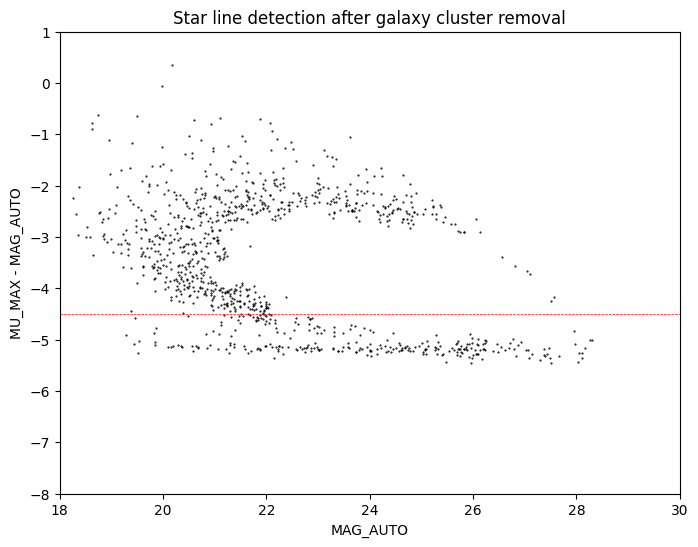

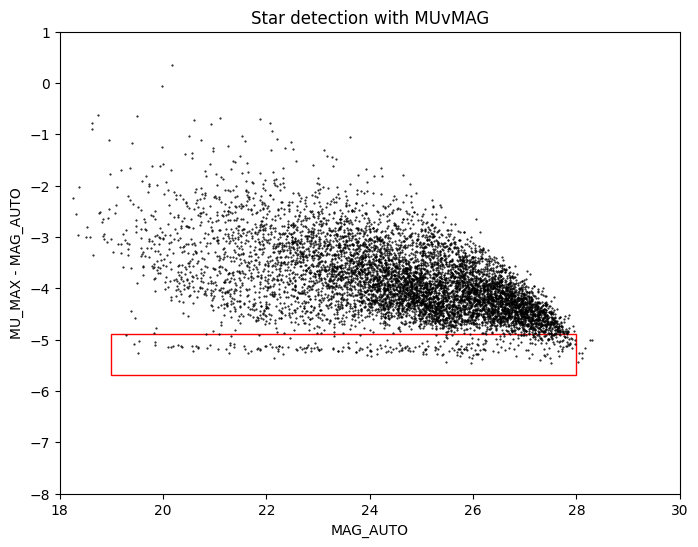

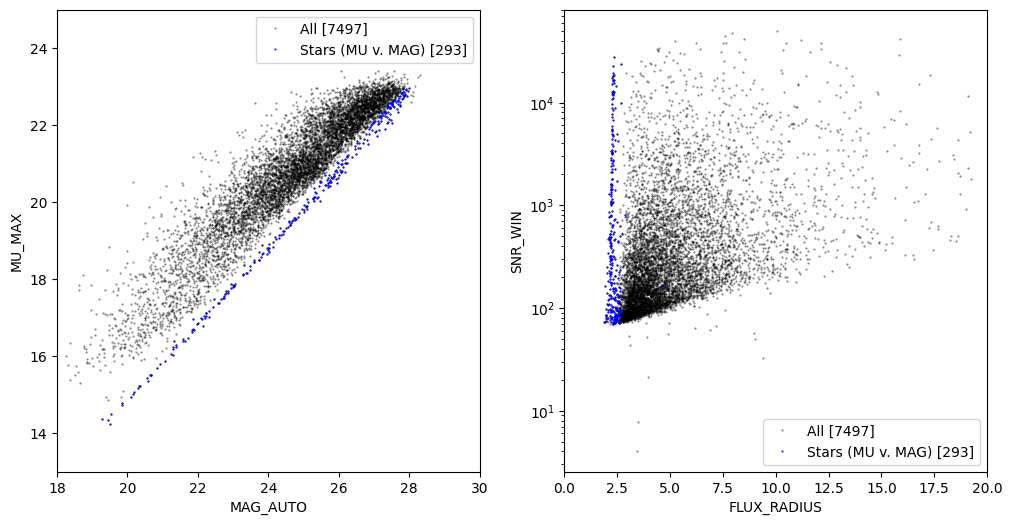

In [53]:
extract_stars(detect_img      = "/home/aurelien/DAWN/DJA_SE++/image/GDS/gds-grizli-v7.0-f444w-clear_drc_sci.fits", \
              weight_img      = "/home/aurelien/DAWN/DJA_SE++/image/GDS/gds-grizli-v7.0-f444w-clear_drc_wht.fits", \
              output_cat      = "/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gdn-grizli-v7.0-f444w-clear_drc_cat.fits", \
              output_cat_star = "/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gdn-grizli-v7.0-f444w-clear_drc_cat_star.fits", \
              config_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST.sex", \
              params_file     = "/home/aurelien/DAWN/DJA_SE++/config/PSFEx-Cat-JWST-SW.param", \
              dir_chckimg     = "/home/aurelien/DAWN/DJA_SE++/JADES-checkimages", \
              y_max = -4.5, \
              save_chckimg = True, plot = False, verbose = True)